In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
bank_full_original = pd.read_csv("../Data/bank-additional-full.csv", sep = ';')

In [143]:
bank = bank_full_original.copy()

In [144]:
bank is bank_full_original

False

In [1]:
bank.head()

NameError: name 'bank' is not defined

In [146]:
bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

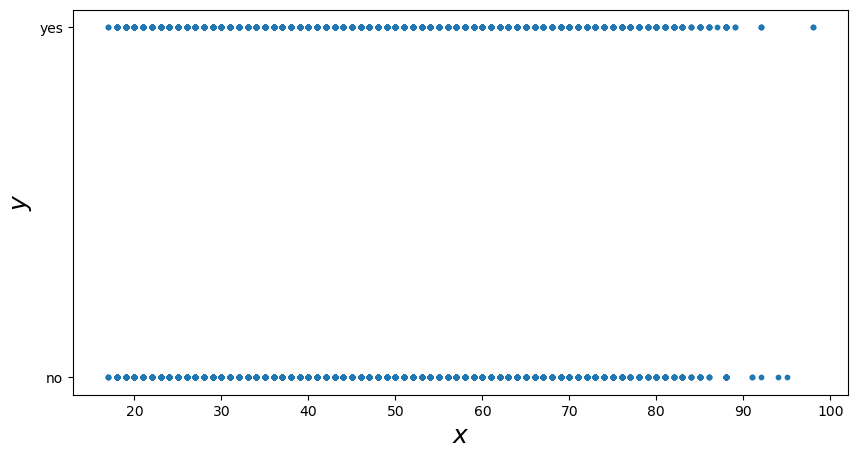

In [147]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.scatter(bank.age,bank.y,s=10)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

In [148]:
bank['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

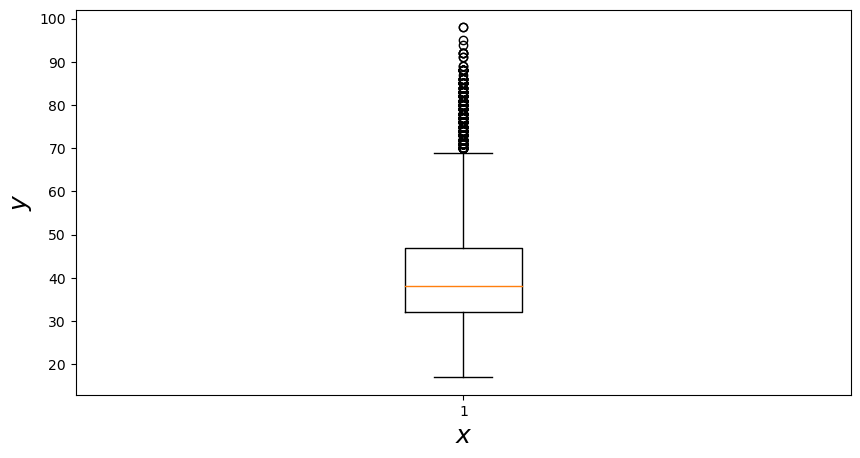

In [149]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.boxplot(bank['age'])

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

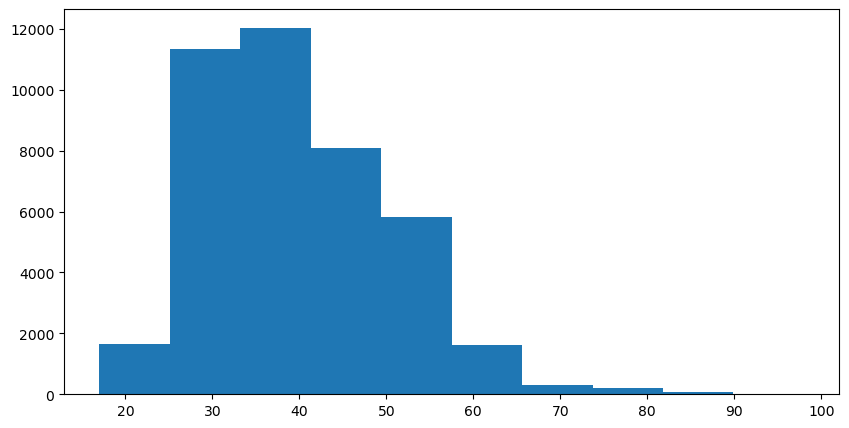

In [150]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.hist(bank.age)



plt.show()

In [151]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [152]:
bank.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [153]:
bank.job.values

array(['housemaid', 'services', 'services', ..., 'retired', 'technician',
       'retired'], dtype=object)

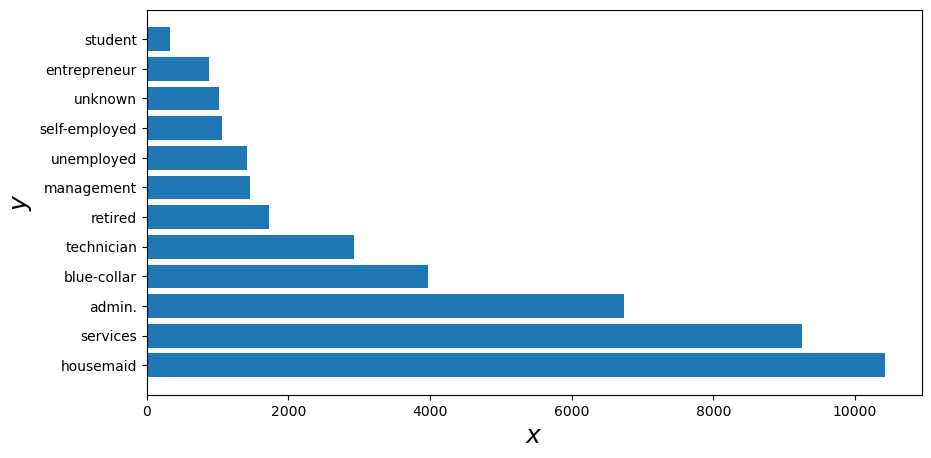

In [154]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.barh(bank.job.unique(), bank.job.value_counts())

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

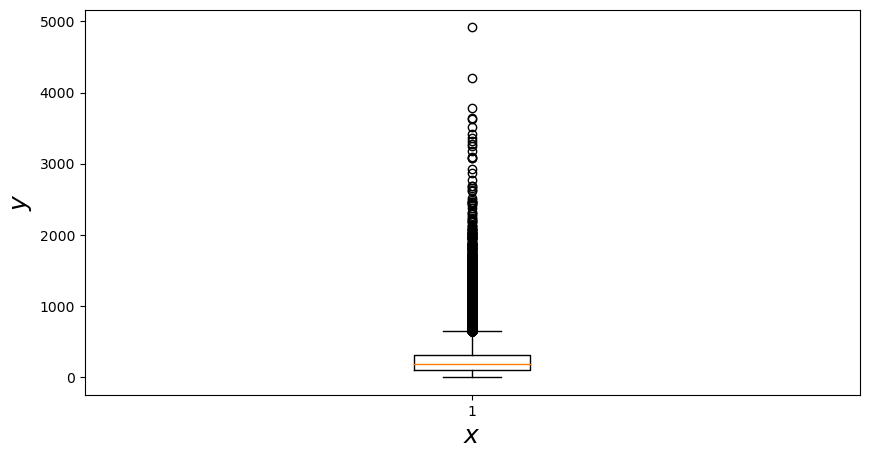

In [155]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.boxplot(bank.duration)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

In [156]:
bank.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [157]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [158]:
bank['job'].values

array(['housemaid', 'services', 'services', ..., 'retired', 'technician',
       'retired'], dtype=object)

In [159]:
bank_feature = list(bank.job.unique())

In [160]:
bank_feature

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student']

In [161]:
type(bank_feature)

list

In [162]:
bank_feature.remove('student')

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
bank_clean = bank.drop(['duration'], axis = 1)

In [165]:
def label_yes_no_housing(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_h'

In [166]:
label_yes_no_housing('test')

'test_h'

In [167]:
def label_yes_no_default(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_d'

In [168]:
def label_yes_no_loan(word: str) -> str:
    """Input a `yes' or `no' and returns a labeled `yes_h' or `no_h'
       for housing'"""
    return str(word)+'_l'

In [169]:
label_yes_no_default('test')

'test_d'

In [170]:
label_yes_no_loan('test')

'test_l'

In [171]:
bank_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [172]:
bank_clean_test = bank_clean.copy()

In [173]:
bank_clean_test is bank_clean

False

In [174]:
bank_clean_test.default.apply(label_yes_no_default)

0             no_d
1        unknown_d
2             no_d
3             no_d
4             no_d
           ...    
41183         no_d
41184         no_d
41185         no_d
41186         no_d
41187         no_d
Name: default, Length: 41188, dtype: object

In [177]:
bank_clean_test.loc[:, 'default'] = bank_clean_test.default.apply(label_yes_no_default)

In [182]:
bank_clean_test.loc[:, 'housing'] = bank_clean_test.housing.apply(label_yes_no_housing)

In [183]:
bank_clean_test.loc[:, 'loan'] = bank_clean_test.loan.apply(label_yes_no_loan)

In [184]:
bank_clean_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no_d,no_d_h_h,no_d_l_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown_d,unknown_d_h_h,unknown_d_l_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no_d,no_d_h_h,no_d_l_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no_d,no_d_h_h,no_d_l_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no_d,no_d_h_h,no_d_l_l,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no_d,no_d_h_h,no_d_l_l,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no_d,no_d_h_h,no_d_l_l,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no_d,no_d_h_h,no_d_l_l,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no_d,no_d_h_h,no_d_l_l,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [70]:
from sklearn.model_selection import train_test_split

## Making the split

bank_train, bank_test = train_test_split(bank_clean.copy(),
                                         random_state = 440,
                                         shuffle = True,
                                         test_size = .2, 
                                         stratify = bank['y'])

In [71]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,39,blue-collar,married,basic.9y,unknown,yes,yes,cellular,apr,wed,1,999,1,failure,-1.8,93.075,-47.1,1.445,5099.1,no
20764,52,housemaid,married,basic.6y,unknown,no,no,cellular,aug,wed,11,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
26157,33,admin.,single,high.school,no,yes,no,cellular,nov,wed,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
34991,28,technician,single,professional.course,no,yes,no,telephone,may,fri,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [186]:
bank_feature

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur']

In [187]:
bank_feature_job = bank_feature.copy()

In [201]:
bank_features_train = {'job': bank_feature_job, 'marital': bank_feature_marital, 'education':bank_feature_education, 'default':bank_feature_default, 'housing':bank_feature_housing, 'loan':bank_feature_loan, 'contact':bank_feature_contact, 'month':bank_feature_month, 'day_of_week':bank_feature_day_of_week, 'poutcome':bank_feature_poutcome}

In [215]:
bank_feature_housing

['no_h', 'yes_h']

In [209]:
bank_features_train.keys()

dict_keys(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [208]:
bank_features_train.values()

dict_values([['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur'], ['married', 'single', 'divorced'], ['university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'illiterate'], ['no_d', 'yes_d'], ['no_h', 'yes_h'], ['no_l', 'yes_l'], ['cellular'], ['aug', 'may', 'nov', 'apr', 'jul', 'mar', 'jun', 'oct', 'sep'], ['wed', 'tue', 'thu', 'mon'], ['failure', 'success']])

In [213]:
bank_features_train['job']

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur']

In [214]:
'admin.' in bank_features_train['job']

True

In [217]:
bank_features_train['housing']

['no_h', 'yes_h']

In [3]:
for key in bank_features_train.keys():
    for value in bank_features_train[key]:
        bank_clean_test[value] = pd.get_dummies(bank_clean_test[key])[value]

NameError: name 'bank_features_train' is not defined

In [72]:
for word in bank_feature:
    bank_train[word] = pd.get_dummies(bank_train['job'])[word]

In [73]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,services,admin.,blue-collar,technician,retired,management,unemployed,self-employed,unknown,entrepreneur
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,0,1,0,0,0,0,0,0,0,0
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,...,0,1,0,0,0,0,0,0,0,0
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,0,0,0,1,0,0,0,0,0,0
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,...,1,0,0,0,0,0,0,0,0,0
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,39,blue-collar,married,basic.9y,unknown,yes,yes,cellular,apr,wed,...,0,0,1,0,0,0,0,0,0,0
20764,52,housemaid,married,basic.6y,unknown,no,no,cellular,aug,wed,...,0,0,0,0,0,0,0,0,0,0
26157,33,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,0,1,0,0,0,0,0,0,0,0
34991,28,technician,single,professional.course,no,yes,no,telephone,may,fri,...,0,0,0,1,0,0,0,0,0,0


In [75]:
print(bank_train.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur']


In [84]:
bank_feature_marital = list(bank_train.marital.unique())

In [85]:
bank_feature_marital

['married', 'single', 'divorced', 'unknown']

In [86]:
bank_feature_marital.remove('unknown')

In [87]:
bank_feature_marital

['married', 'single', 'divorced']

In [88]:
bank_feature_education = list(bank_train.education.unique())
bank_feature_education.remove("unknown")

In [89]:
bank_feature_education

['university.degree',
 'professional.course',
 'high.school',
 'basic.9y',
 'basic.4y',
 'basic.6y',
 'illiterate']

In [91]:
bank_feature_default = list(bank_train.default.unique())
bank_feature_default.remove("unknown")

In [189]:
bank_feature_default[0] = 'no_d'
bank_feature_default[1] = 'yes_d'

In [190]:
bank_feature_default

['no_d', 'yes_d']

In [191]:
bank_feature_housing[0] = 'no_h'
bank_feature_housing[1] = 'yes_h'

In [192]:
bank_feature_loan[0] = 'no_l'
bank_feature_loan[1] = 'yes_l'

In [193]:
print(bank_feature_housing)
print(bank_feature_loan)

['no_h', 'yes_h']
['no_l', 'yes_l']


In [93]:
bank_feature_housing = list(bank_train.housing.unique())
bank_feature_housing.remove("unknown")

In [94]:
bank_feature_loan = list(bank_train.loan.unique())
bank_feature_loan.remove("unknown")

In [95]:
bank_feature_day_of_week = list(bank_train.day_of_week.unique())
bank_feature_day_of_week.remove("fri")

In [96]:
bank_feature_day_of_week

['wed', 'tue', 'thu', 'mon']

In [198]:
bank_feature_contact = list(bank_train.contact.unique())
bank_feature_contact

['cellular', 'telephone']

In [199]:
bank_feature_contact.remove('telephone')

In [200]:
bank_feature_contact

['cellular']

In [97]:
bank_feature_month = list(bank_train.month.unique())
bank_feature_month

['aug', 'may', 'nov', 'apr', 'jul', 'mar', 'jun', 'oct', 'sep', 'dec']

In [98]:
bank_feature_month.remove("dec")

In [99]:
bank_feature_poutcome = list(bank_train.poutcome.unique())
bank_feature_poutcome.remove("nonexistent")

In [101]:
features = bank_feature_day_of_week + bank_feature_default + bank_feature_education + bank_feature_housing + bank_feature_loan + bank_feature_marital + bank_feature_month + bank_feature_poutcome

In [102]:
features

['wed',
 'tue',
 'thu',
 'mon',
 'no',
 'yes',
 'university.degree',
 'professional.course',
 'high.school',
 'basic.9y',
 'basic.4y',
 'basic.6y',
 'illiterate',
 'no',
 'yes',
 'no',
 'yes',
 'married',
 'single',
 'divorced',
 'aug',
 'may',
 'nov',
 'apr',
 'jul',
 'mar',
 'jun',
 'oct',
 'sep',
 'failure',
 'success']

In [103]:
len(features)

31

In [104]:
for word in bank_feature_marital:
    bank_train[word] = pd.get_dummies(bank_train['marital'])[word]

In [105]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,technician,retired,management,unemployed,self-employed,unknown,entrepreneur,married,single,divorced
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,0,0,0,0,0,0,0,1,0,0
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,...,0,0,0,0,0,0,0,0,1,0
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,0,0,0,0,0,1,0,0
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,...,0,0,0,0,0,0,0,1,0,0
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,39,blue-collar,married,basic.9y,unknown,yes,yes,cellular,apr,wed,...,0,0,0,0,0,0,0,1,0,0
20764,52,housemaid,married,basic.6y,unknown,no,no,cellular,aug,wed,...,0,0,0,0,0,0,0,1,0,0
26157,33,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,0,0,0,0,0,0,0,0,1,0
34991,28,technician,single,professional.course,no,yes,no,telephone,may,fri,...,1,0,0,0,0,0,0,0,1,0


In [106]:
for word in bank_feature_education:
    bank_train[word] = pd.get_dummies(bank_train['education'])[word]

In [107]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,married,single,divorced,university.degree,professional.course,high.school,basic.9y,basic.4y,basic.6y,illiterate
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,1,0,0,1,0,0,0,0,0,0
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,...,0,1,0,1,0,0,0,0,0,0
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,0,0,1,0,0,0,0,0
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,...,1,0,0,0,1,0,0,0,0,0
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,39,blue-collar,married,basic.9y,unknown,yes,yes,cellular,apr,wed,...,1,0,0,0,0,0,1,0,0,0
20764,52,housemaid,married,basic.6y,unknown,no,no,cellular,aug,wed,...,1,0,0,0,0,0,0,0,1,0
26157,33,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,0,1,0,0,0,1,0,0,0,0
34991,28,technician,single,professional.course,no,yes,no,telephone,may,fri,...,0,1,0,0,1,0,0,0,0,0


In [108]:
for word in bank_feature_default:
    bank_train[word] = pd.get_dummies(bank_train['default'])[word]

In [118]:
for word in bank_feature_housing:
    bank_train[word] = pd.get_dummies(bank_train['housing'])[word]    

In [119]:
for word in bank_feature_loan:
    bank_train[word] = pd.get_dummies(bank_train['loan'])[word]

In [120]:
for word in bank_feature_day_of_week:
    bank_train[word] = pd.get_dummies(bank_train["day_of_week"])[word]

In [117]:
bank_feature_housing

['no', 'yes']

In [112]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,basic.9y,basic.4y,basic.6y,illiterate,no,yes,wed,tue,thu,mon
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,0,0,0,0,1,0,1,0,0,0
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,...,0,0,0,0,1,0,1,0,0,0
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,0,0,0,0,1,0,0,0,0,0
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,...,0,0,0,0,1,0,0,0,0,0
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,39,blue-collar,married,basic.9y,unknown,yes,yes,cellular,apr,wed,...,1,0,0,0,0,1,1,0,0,0
20764,52,housemaid,married,basic.6y,unknown,no,no,cellular,aug,wed,...,0,0,1,0,1,0,1,0,0,0
26157,33,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,0,0,0,0,1,0,1,0,0,0
34991,28,technician,single,professional.course,no,yes,no,telephone,may,fri,...,0,0,0,0,1,0,0,0,0,0


In [113]:
for word in bank_feature_month:
    bank_train[word] = pd.get_dummies(bank_train['month'])[word]

In [114]:
for word in bank_feature_poutcome:
    bank_train[word] = pd.get_dummies(bank_train["poutcome"])[word]

In [115]:
bank_train.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'married',
 'single',
 'divorced',
 'university.degree',
 'professional.course',
 'high.school',
 'basic.9y',
 'basic.4y',
 'basic.6y',
 'illiterate',
 'no',
 'yes',
 'wed',
 'tue',
 'thu',
 'mon',
 'aug',
 'may',
 'nov',
 'apr',
 'jul',
 'mar',
 'jun',
 'oct',
 'sep',
 'failure',
 'success']

In [116]:
len(bank_train.columns.tolist())

58

In [121]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,may,nov,apr,jul,mar,jun,oct,sep,failure,success
20813,30,admin.,married,university.degree,no,no,no,cellular,aug,wed,...,0,0,0,0,0,0,0,0,0,0
4990,32,admin.,single,university.degree,no,no,no,telephone,may,wed,...,1,0,0,0,0,0,0,0,0,0
27391,34,technician,married,professional.course,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,0,0
7337,42,services,married,professional.course,no,no,no,telephone,may,fri,...,1,0,0,0,0,0,0,0,0,0
4500,50,admin.,single,university.degree,no,yes,no,telephone,may,tue,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28300,39,blue-collar,married,basic.9y,unknown,yes,yes,cellular,apr,wed,...,0,0,1,0,0,0,0,0,1,0
20764,52,housemaid,married,basic.6y,unknown,no,no,cellular,aug,wed,...,0,0,0,0,0,0,0,0,0,0
26157,33,admin.,single,high.school,no,yes,no,cellular,nov,wed,...,0,1,0,0,0,0,0,0,0,0
34991,28,technician,single,professional.course,no,yes,no,telephone,may,fri,...,1,0,0,0,0,0,0,0,0,0


In [122]:
bank_train.campaign.describe()

count    32950.000000
mean         2.569560
std          2.782537
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [123]:
bank_train.pdays.describe()

count    32950.000000
mean       962.717056
std        186.313292
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

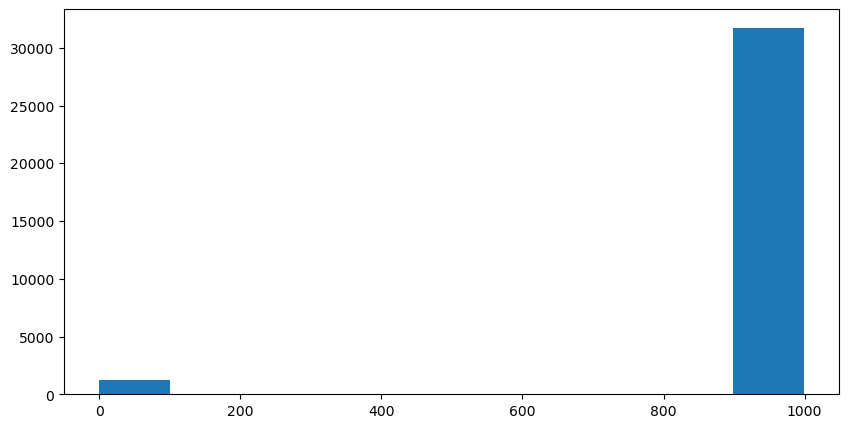

In [124]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.hist(bank_train.pdays)



plt.show()

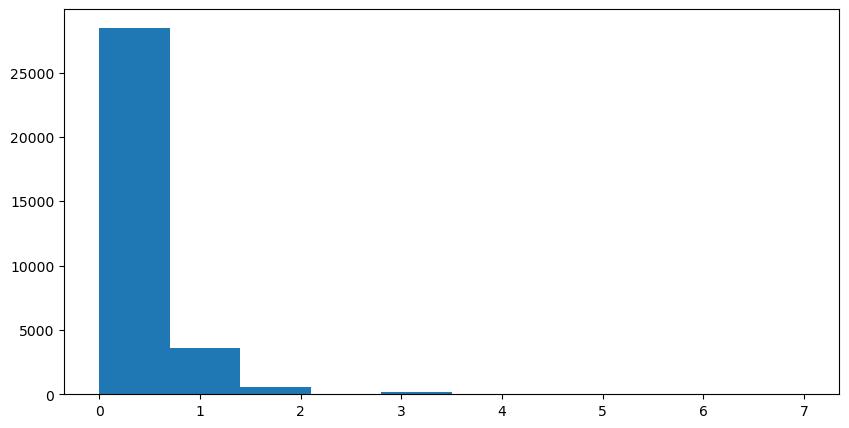

In [125]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.hist(bank_train.previous)



plt.show()